In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
sns.set()
%matplotlib inline
%precision 6

'%.6f'

In [3]:
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 6

In [4]:
df = pd.read_json('../live-stats/2023-04-02-bat.json')
bats = pd.json_normalize(data=df.to_dict("records"))
# print(f"bats: {bats}")

pitches = pd.DataFrame([])
pitches.empty
for _, bat in bats.iterrows():
    bat = pd.DataFrame(bat).T
    # print(f"bat: {bat}")
    batter = bat[['batter.id', 'batter.name', 'batter.handed']].reset_index(drop=True)
    # print(f"B: {batter}")
    pitcher = bat[['pitcher.id', 'pitcher.name', 'pitcher.handed']].reset_index(drop=True)
    # print(f"P: {pitcher}")

    # 空のDataFrame
    # cols = ['kind','number', 'number_of', 'result', 'speed', 'cource.left', 'cource.top'] 
    # print(pitches)
    for ps in bat['pitches']:
        for p in ps:
            pitch = pd.json_normalize(p)
            # print(f"PT: {pitch}")
            df = pd.concat([pitcher, batter, pitch], axis=1)
            # print(f"DF: {df}")
            if not pitches.empty:
                pitches = pd.concat([pitches, df])
            else:
                pitches = df
    
pitches.reset_index(drop=True, inplace=True)
pitches.to_csv('../live-stats/pitches-2023-04-02.csv', index=False)


In [5]:
pitcher_id = 1200106

In [6]:
pitcher_pitches = pitches.loc[pitches['pitcher.id']==pitcher_id]

In [7]:
kinds = pitches['kind'].unique()
kinds

array(['ストレート', 'カットボール', 'シュート', 'カーブ', 'チェンジアップ', 'フォーク', 'スライダー',
       'ツーシーム', 'スプリット', 'ワンシーム', 'ナックルカーブ', 'スクリュー', '縦スライダー', 'シンカー'],
      dtype=object)

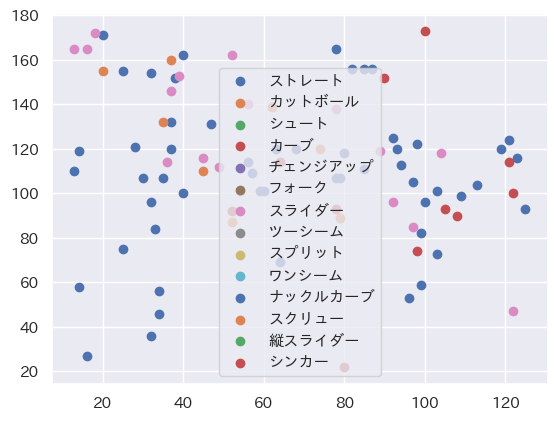

In [8]:
for k in kinds:
    df = pitcher_pitches.loc[pitcher_pitches['kind']==k]
    plt.scatter(x=df['cource.left'], y=df['cource.top'], label=k)
    plt.legend()

plt.show()

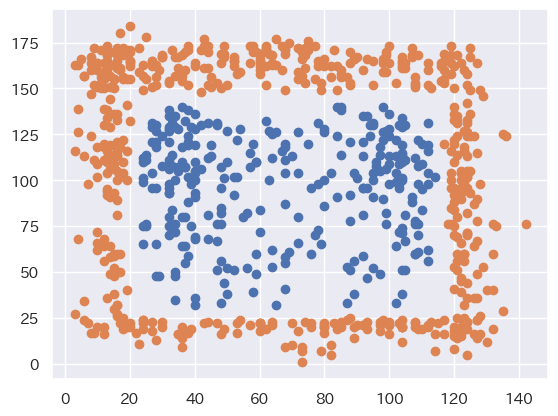

In [9]:
s_df = pitches.loc[pitches['result']=='見逃し']
b_df = pitches.loc[pitches['result']=='ボール']
plt.scatter(x=s_df['cource.left'], y=s_df['cource.top'])
plt.scatter(x=b_df['cource.left'], y=b_df['cource.top'])